### Name : Aditya Bhawsar
### PRN : 250240128002

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn import datasets
import matplotlib.pyplot as plt


In [2]:
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)  #Set Random Seed for reproducible results
rng = np.random.default_rng(seed=RANDOM_STATE)

NOISE = 0.2
TEST_SIZE = 0.2  #Size of test data
ALPHA = 0.01
N_SAMPLES = 1000
EPOCHS = 150001

#parameters for matplotlib
params = {'legend.fontsize' : 'medium',
          'figure.figsize' : (10,6),
          'axes.labelsize': 'large',
          'axes.titlesize': 'large',
          'xtick.labelsize' : 'medium',
          'ytick.labelsize' : 'medium'
          }
CMAP = plt.cm.jet

plt.rcParams.update(params)


In [3]:
X,y = datasets.make_moons(n_samples=N_SAMPLES,shuffle=True,noise=NOISE,random_state=RANDOM_STATE)

In [4]:
data_df = pd.DataFrame(X,columns=['A','B'])
data_df['target'] = y
data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


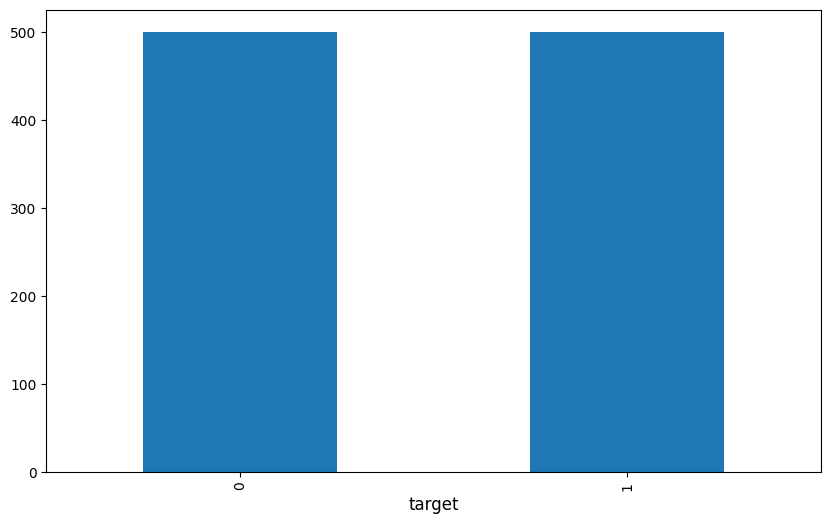

In [5]:
fig, ax = plt.subplots()
data_df['target'].value_counts().plot(ax=ax,kind='bar')
plt.show()

In [6]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=TEST_SIZE,random_state=RANDOM_STATE, stratify= y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [7]:
def fn_sigmoid(z):
#   return 1 if z>= 0 else 0
  print(z)
  return 1/(1+np.exp(-z))

In [8]:
def fn_activ(z):
  return np.tanh(z)
def fn_activ_prime(a):
  return 1.0 - (np.tanh(a))**2

In [9]:
def predict(model, x_p):
  w1 = model['w1']
  b1 = model['b1']
  w2 = model['w2']
  b2 = model['b2']
  # forward propagation
  #layer 1


  z1 = x_p.dot(w1) + b1#aggregation
  a1 = fn_activ(z1)#activation
  #layer 2
  z2 = a1.dot(w2) + b2
  a2 = fn_sigmoid(z2)
  return a2 >= 0.5


In [10]:
def cal_loss(model, x_l, y_l):
  w1 = model['w1']
  b1 = model['b1']
  w2 = model['w2']
  b2 = model['b2']
  m = x_l.shape[0]
  # forward propagation
  #layer 1

  z1 = x_l.dot(w1) + b1#aggregation
  a1 = fn_activ(z1)#activation
  #layer 2
  z2 = a1.dot(w2) + b2
  a2 = fn_sigmoid(z2)
  loss = -(y_l * np.log(a2)).sum() / m
  #loss = -(y_l * np.log(a2) + (1-y_l).np.log(1-a2)).sum() /m
  return loss


In [11]:
loss_hist = {}

In [12]:
def build_model(nn_hdim, x,y, epochs = EPOCHS, alpha=ALPHA):

  m, nn_input_dim = x.shape
  nn_output_dim = y.shape[1]

  # weight
  w1 = rng.random((nn_input_dim, nn_hdim), dtype=np.float32)/np.sqrt(nn_input_dim)
  w2 = rng.random((nn_hdim, nn_output_dim), dtype=np.float32)/np.sqrt(nn_hdim)

  # bias
  b1 = np.zeros((1,nn_hdim), dtype=np.float32)
  b2 = np.zeros((1,nn_output_dim), dtype=np.float32)

  curr_loss, loss, epoch = [], [], []
  for i in range(0,epochs):
    # Forward Propogation
    # layer 1
    z1 = x.dot(w1) + b1  #aggregation
    a1 = fn_activ(z1)    #activation
    # layer 2
    z2 = a1.dot(w2) + b2
    a2 = fn_sigmoid(z2)

    # back propogation
    # error: if the shape of a2 aand y does not match
    # ------
    # layer2
    # ------
    assert(a2.shape==y.shape), f'a2 shape:{a2.shape}, y shape:{y.shape}'
    dz2 = a2 - y

    dw2 = (a1.T).dot(dz2)
    assert(dw2.shape == w2.shape), f'dw2 shape:{dw2.shape}, w2 shape:{w2.shape}'

    db2 = np.sum(dz2, axis=0, keepdims=True)
    assert(db2.shape == b2.shape), f'db2 shape:{db2.shape}, b2 shape:{b2.shape}'

    da1= dz2.dot(w2.T)
    assert(da1.shape == a1.shape), f'da1 shape:{da1.shape}, a1 shape:{a1.shape}'



    # -------
    # layer1
    # -------

    dz1 = da1 * fn_activ_prime(z1) #element-wise multiplication due to identical dim
    assert(dz1.shape == z1.shape), f'dz1 shape{dz1.shape}, z1 shape:{z1.shape}'

    dw1 = (x.T).dot(dz1)
    assert(dw1.shape == w1.shape), f'dw1 shape{dw1.shape}, w1 shape:{w1.shape}'

    db1 = np.sum(dz1, axis=0, keepdims = True)
    assert(db1.shape == b1.shape), f'db1 shape{db1.shape}, b1 shape:{b1.shape}'


    # Gradient update

    w1 += - alpha * dw1 / m
    b1 += - alpha* db1 / m
    w2 += - alpha * dw2 / m
    b2 += - alpha * db2 / m

    model = {'w1': w1, 'b1': b1, 'w2': w2, 'b2': b2}

    if i % 100 == 0:
      curr_loss = cal_loss(model, x, y)
      loss.append(curr_loss)
      epoch.append(i)

    if i%1000 == 0:
      print(f'Info: loss after {i: >5d} is {curr_loss: 8.5f}')

    # update loss
    loss_hist['epoch'] = epoch
    loss_hist['loss'] = loss

  return model



In [13]:
y_train = y_train.reshape(-1,1)
y_train.shape

(800, 1)

In [14]:
model = build_model(4,x_train,y_train)
display(model)

Streaming output truncated to the last 5000 lines.
 [ -8.19878405]
 [ -5.75007607]
 [  8.1552417 ]
 [ -7.94153568]
 [ -5.01365864]
 [  6.35458433]
 [  6.46772249]
 [ -9.65579123]
 [-11.07593787]
 [-10.93593293]
 [ -6.5904077 ]
 [  7.83758093]
 [  4.18552375]
 [  6.70249525]
 [-11.01000311]
 [ -6.22580108]
 [ -6.04835141]
 [ -8.7087639 ]
 [-10.21586586]
 [  7.87660398]
 [ -2.93323267]
 [  6.74123364]
 [  1.89161251]
 [ -7.49940858]
 [  6.39619472]
 [ -9.31913166]
 [  2.93016277]
 [ -7.26247516]
 [ -6.27651617]
 [  6.53968775]
 [ -3.69839037]
 [  6.42829384]
 [ -7.68194459]
 [ -0.30051826]
 [ -6.94533044]
 [ -6.81171502]
 [  9.48332298]
 [  6.55987654]
 [  8.9749949 ]
 [  6.70954187]
 [ -7.22821788]
 [  6.0162203 ]
 [ -8.77307223]
 [  5.38464075]
 [ -8.72261038]
 [  6.22084686]
 [ -6.70201012]
 [ -4.91887592]
 [ -4.63701291]
 [  6.28871258]
 [ -7.22364738]
 [  1.77375838]
 [  5.67348387]
 [-11.98486611]
 [ -1.02050837]
 [  6.08425146]
 [  6.77429994]
 [  6.31897518]
 [  6.64002315]
 [  5

{'w1': array([[ 3.51992145,  2.28264199,  3.1695548 ,  2.65497168],
        [ 3.15672626, -0.99417599, -1.40442496, -1.10265357]]),
 'b1': array([[-2.3718174,  1.4495571, -4.0528684,  1.4707727]], dtype=float32),
 'w2': array([[-6.86699815],
        [ 3.34270914],
        [ 6.90297124],
        [ 3.9246087 ]]),
 'b2': array([[-0.5145415]], dtype=float32)}

In [15]:
loss_df = pd.DataFrame(loss_hist)
loss_df.head()

,epoch,loss
0,0,0.291208
1,100,0.294563
2,200,0.293671
3,300,0.289259
4,400,0.282284


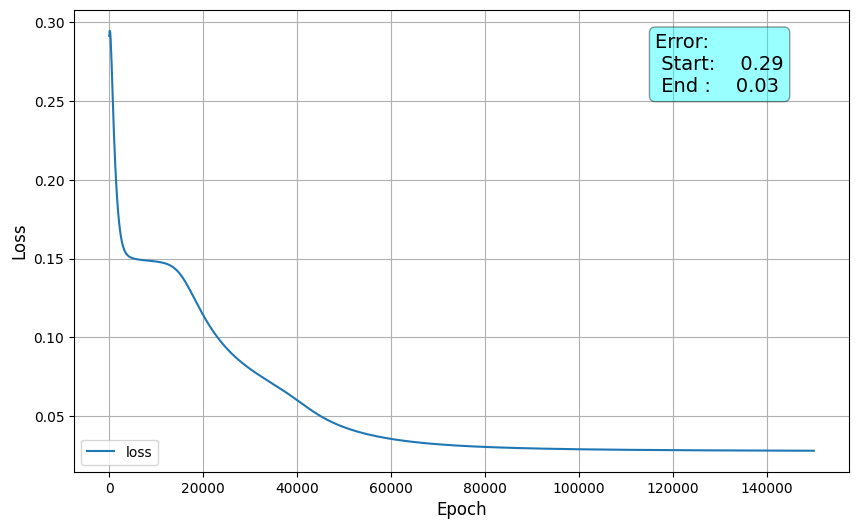

In [16]:
fig,ax = plt.subplots()
loss_df.plot(x='epoch',y='loss', ax = ax)
txtstr = "Error: \n Start: {:7.2f}\n End : {:7.2f}".format(loss_df.iloc[0]['loss'],loss_df.iloc[-1]['loss'])
props = dict(boxstyle='round', facecolor='cyan', alpha=0.4)
ax.text(0.75, 0.95,txtstr , transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.grid()
plt.show()

In [ ]:
def fn_plot_decision_boundary(pred_func, x_tr, y_tr, x_ts,y_ts):
    '''

    '''
    fig, ax = plt.subplots(figsize = (15,5))
    dm = 0.05
    x_min, x_max = x_tr[:,0].min() - 0.5, x_tr[:,0].max() + 0.5
    y_min, y_max = x_tr[:,1].min() - 0.5, x_tr[:,1].max() + 0.5

    x1 , y1 = np.meshgrid(np.arange(x_min, x_max, dm), np.arange(y_min, y_max, dm))

    XX = np.c_[x1.ravel(), y1.ravel()]
    # XX = np.hstack((XX, np.ones((XX.shape[0],1))))

    # y_pred = []

    # for row in (XX):
    #     a = predict(row, weights=wts)
    #     y_p = 0
    #     if a>=0.5: y_p=1
    #     y_pred.append(y_p)

    Z = pred_func(XX)
    Z = Z.reshape(x1.shape)
    ax.contourf(x1,y1,Z, alpha = 0.6, cmap=plt.cm.Paired)
    ax.scatter(x_tr[:,0], x_tr[:,1], c =y_tr, s=15, edgecolor='k', cmap=plt.cm.bwr)
    ax.scatter(x_ts[:,0], x_ts[:,1], c =y_ts, s=55,marker='*', edgecolor='k', cmap=plt.cm.Paired)

[[-7.70081337]
 [-7.66984471]
 [-7.63075879]
 ...
 [ 6.23399983]
 [ 6.38022556]
 [ 6.48877962]]


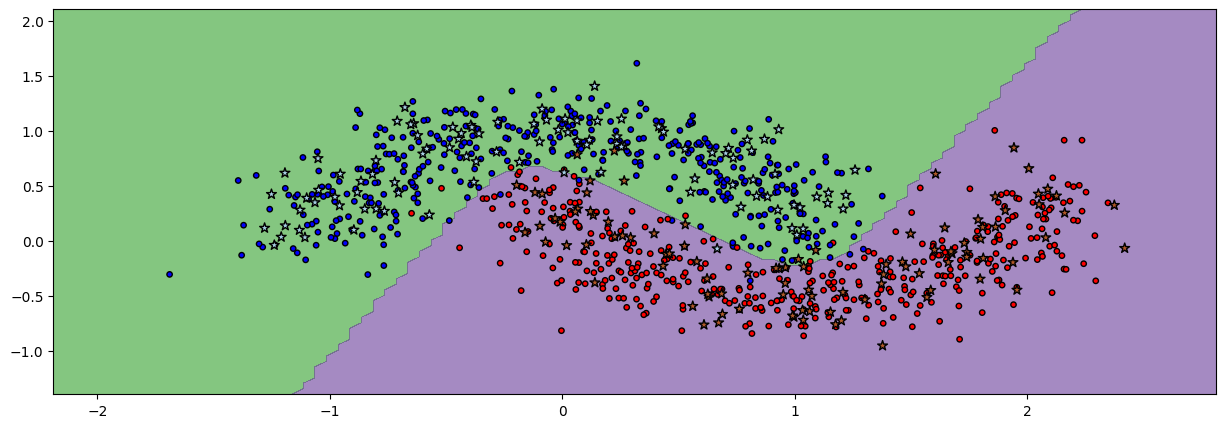

In [ ]:
fn_plot_decision_boundary(lambda XX : predict(model,XX),x_train,y_train,x_test,y_test)

**Q1**: Is this model more accurate compared to previous model?

Yes, the new model is more accurate than the previous one. Using tanh and sigmoid activation functions along with backpropagation allows the network to learn and adjust weights based on errors, enabling better generalization. In contrast, the step function is non-differentiable and doesn't support learning via backpropagation, limiting the model's accuracy and adaptability.

**Q2**: Prepare table by changing number of neurons in hidden layer, learning rate and observe change in results. Also comment on your results.

|#|Dimension of hidden layer|Learning rate|Training Accuracy|Test Accuracy|Comment|
|:-:|:-:|:-:|:-:|:-:|:--|
|1|4|0.1|0.97|0.96|Base case|
|2|1|0.01|0.87|0.85| |
|3|10|0.01|0.90|0.91|...|
|4|10|1|0.98|0.96|...|
|5|7|1|0.98|0.96|...|
|6|7|0.01|0.89|0.90|...|

**Q3**: What lines will you change to convert it into multi-class prediction model?

Replace the output layer activation function with softmax instead of sigmoid.
Also, modify the loss function to categorical cross-entropy for multi-class prediction.

In [19]:
X,y = datasets.make_moons(n_samples=1280,shuffle=True,noise=NOISE,random_state=RANDOM_STATE)

In [20]:
data_df = pd.DataFrame(X,columns=['A','B'])
data_df['target'] = y
data_df.head()

,A,B,target
0,2.278847,0.261685,1
1,-0.237900,0.867193,0
2,-0.003919,-0.286788,1
3,2.043478,0.633036,1
4,0.096895,-0.255522,1


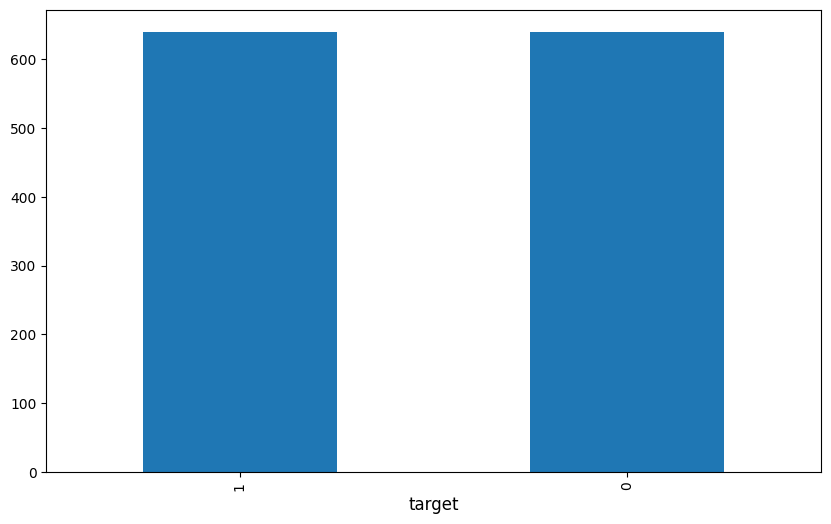

In [21]:
fig, ax = plt.subplots()
data_df['target'].value_counts().plot(ax=ax,kind='bar')
plt.show()

In [ ]:
y = pd.get_dummies(y).to_numpy()

In [23]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=TEST_SIZE,random_state=RANDOM_STATE, stratify= y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1024, 2), (256, 2), (1024, 2), (256, 2))

In [24]:
def fn_softmax(z):
  exp_sc = np.exp(z)
  return exp_sc/np.sum(exp_sc, axis=1, keepdims=True)

In [25]:
def fn_activ(z):
  return np.tanh(z)
def fn_activ_prime(a):
  return 1.0 - (np.tanh(a))**2

In [26]:
def predict(model, x_p):
  w1 = model['w1']
  b1 = model['b1']
  w2 = model['w2']
  b2 = model['b2']
  # forward propagation
  #layer 1


  z1 = x_p.dot(w1) + b1#aggregation
  a1 = fn_activ(z1)#activation
  #layer 2
  z2 = a1.dot(w2) + b2
  a2 = fn_softmax(z2)
  return np.argmax(a2,axis=1)


In [27]:
def cal_loss(model, x_l, y_l):
  w1 = model['w1']
  b1 = model['b1']
  w2 = model['w2']
  b2 = model['b2']
  m = x_l.shape[0]
  # forward propagation
  #layer 1

  z1 = x_l.dot(w1) + b1#aggregation
  a1 = fn_activ(z1)#activation
  #layer 2
  z2 = a1.dot(w2) + b2
  a2 = fn_softmax(z2)
  loss = - (y_l * np.log(a2) + (1 - y_l) * np.log(1 - a2)).sum()/m
  return loss


In [28]:
loss_hist = {}

In [29]:
def build_model(nn_hdim, x,y, epochs = EPOCHS, alpha=ALPHA):

  m, nn_input_dim = x.shape
  nn_output_dim = y.shape[1]

  # weight
  w1 = rng.random((nn_input_dim, nn_hdim), dtype=np.float32)/np.sqrt(nn_input_dim)
  w2 = rng.random((nn_hdim, nn_output_dim), dtype=np.float32)/np.sqrt(nn_hdim)

  # bias
  b1 = np.zeros((1,nn_hdim), dtype=np.float32)
  b2 = np.zeros((1,nn_output_dim), dtype=np.float32)

  curr_loss, loss, epoch = [], [], []
  for i in range(0,epochs):
    # Forward Propogation
    # layer 1
    z1 = x.dot(w1) + b1  #aggregation
    a1 = fn_activ(z1)    #activation
    # layer 2
    z2 = a1.dot(w2) + b2
    a2 = fn_softmax(z2)

    # back propogation
    # error: if the shape of a2 aand y does not match
    # ------
    # layer2
    # ------
    assert(a2.shape==y.shape), f'a2 shape:{a2.shape}, y shape:{y.shape}'
    dz2 = a2 - y

    dw2 = (a1.T).dot(dz2)
    assert(dw2.shape == w2.shape), f'dw2 shape:{dw2.shape}, w2 shape:{w2.shape}'

    db2 = np.sum(dz2, axis=0, keepdims=True)
    assert(db2.shape == b2.shape), f'db2 shape:{db2.shape}, b2 shape:{b2.shape}'

    da1= dz2.dot(w2.T)
    assert(da1.shape == a1.shape), f'da1 shape:{da1.shape}, a1 shape:{a1.shape}'



    # -------
    # layer1
    # -------

    dz1 = da1 * fn_activ_prime(z1) #element-wise multiplication due to identical dim
    assert(dz1.shape == z1.shape), f'dz1 shape{dz1.shape}, z1 shape:{z1.shape}'

    dw1 = (x.T).dot(dz1)
    assert(dw1.shape == w1.shape), f'dw1 shape{dw1.shape}, w1 shape:{w1.shape}'

    db1 = np.sum(dz1, axis=0, keepdims = True)
    assert(db1.shape == b1.shape), f'db1 shape{db1.shape}, b1 shape:{b1.shape}'


    # Gradient update

    w1 += - alpha * dw1 / m
    b1 += - alpha* db1 / m
    w2 += - alpha * dw2 / m
    b2 += - alpha * db2 / m

    model = {'w1': w1, 'b1': b1, 'w2': w2, 'b2': b2}

    if i % 100 == 0:
      curr_loss = cal_loss(model, x, y)
      loss.append(curr_loss)
      epoch.append(i)

    if i%1000 == 0:
      print(f'Info: loss after {i: >5d} is {curr_loss: 8.5f}')

    # update loss
    loss_hist['epoch'] = epoch
    loss_hist['loss'] = loss

  return model



In [30]:
model = build_model(4,x_train,y_train)
display(model)

Info: loss after     0 is  1.37280
Info: loss after  1000 is  0.73561
Info: loss after  2000 is  0.65094
Info: loss after  3000 is  0.63704
Info: loss after  4000 is  0.63228
Info: loss after  5000 is  0.62869
Info: loss after  6000 is  0.62481
Info: loss after  7000 is  0.61991
Info: loss after  8000 is  0.61300
Info: loss after  9000 is  0.60267
Info: loss after 10000 is  0.58729
Info: loss after 11000 is  0.56589
Info: loss after 12000 is  0.53916
Info: loss after 13000 is  0.50929
Info: loss after 14000 is  0.47877
Info: loss after 15000 is  0.44955
Info: loss after 16000 is  0.42273
Info: loss after 17000 is  0.39875
Info: loss after 18000 is  0.37760
Info: loss after 19000 is  0.35906
Info: loss after 20000 is  0.34277
Info: loss after 21000 is  0.32839
Info: loss after 22000 is  0.31554
Info: loss after 23000 is  0.30389
Info: loss after 24000 is  0.29314
Info: loss after 25000 is  0.28306
Info: loss after 26000 is  0.27345
Info: loss after 27000 is  0.26425
Info: loss after 280

{'w1': array([[ 2.98999586,  3.05953279,  1.31385253, -2.11436519],
        [-1.24261424,  1.86836066,  0.10400147,  1.20655185]]),
 'b1': array([[ 1.2361081 , -1.7886865 ,  0.75740826,  2.7869837 ]],
       dtype=float32),
 'w2': array([[-2.64160929,  3.13956235],
        [ 4.17769721, -3.64325911],
        [-1.12515456,  1.98872785],
        [ 4.0788832 , -3.93058619]]),
 'b2': array([[ 0.04399763, -0.04399763]], dtype=float32)}

In [31]:
loss_df = pd.DataFrame(loss_hist)
loss_df.head()

,epoch,loss
0,0,1.372800
1,100,1.321727
2,200,1.246882
3,300,1.146721
4,400,1.041094


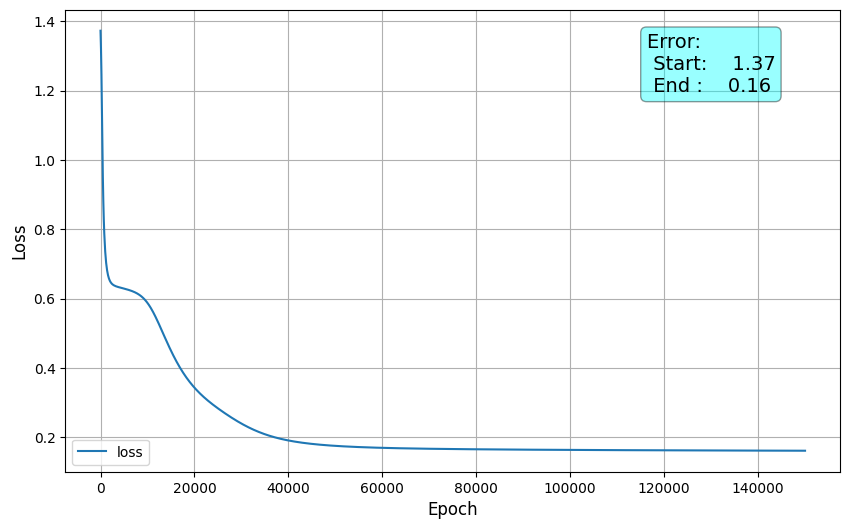

In [32]:
fig,ax = plt.subplots()
loss_df.plot(x='epoch',y='loss', ax = ax)
txtstr = "Error: \n Start: {:7.2f}\n End : {:7.2f}".format(loss_df.iloc[0]['loss'],loss_df.iloc[-1]['loss'])
props = dict(boxstyle='round', facecolor='cyan', alpha=0.4)
ax.text(0.75, 0.95,txtstr , transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.grid()
plt.show()

In [33]:
def fn_plot_decision_boundary(pred_func, x_tr, y_tr, x_ts,y_ts):
    '''

    '''
    fig, ax = plt.subplots(figsize = (15,5))
    dm = 0.05
    x_min, x_max = x_tr[:,0].min() - 0.5, x_tr[:,0].max() + 0.5
    y_min, y_max = x_tr[:,1].min() - 0.5, x_tr[:,1].max() + 0.5

    x1 , y1 = np.meshgrid(np.arange(x_min, x_max, dm), np.arange(y_min, y_max, dm))

    XX = np.c_[x1.ravel(), y1.ravel()]
    # XX = np.hstack((XX, np.ones((XX.shape[0],1))))

    # y_pred = []

    # for row in (XX):
    #     a = predict(row, weights=wts)
    #     y_p = 0
    #     if a>=0.5: y_p=1
    #     y_pred.append(y_p)

    Z = pred_func(XX)
    Z = Z.reshape(x1.shape)
    ax.contourf(x1,y1,Z, alpha = 0.6, cmap=plt.cm.coolwarm)
    ax.scatter(x_tr[:,0], x_tr[:,1], c =y_tr.argmax(axis=1), s=15, edgecolor='k', cmap=plt.cm.bwr)
    ax.scatter(x_ts[:,0], x_ts[:,1], c =y_ts.argmax(axis=1), s=55,marker='*', edgecolor='k', cmap=plt.cm.Paired)




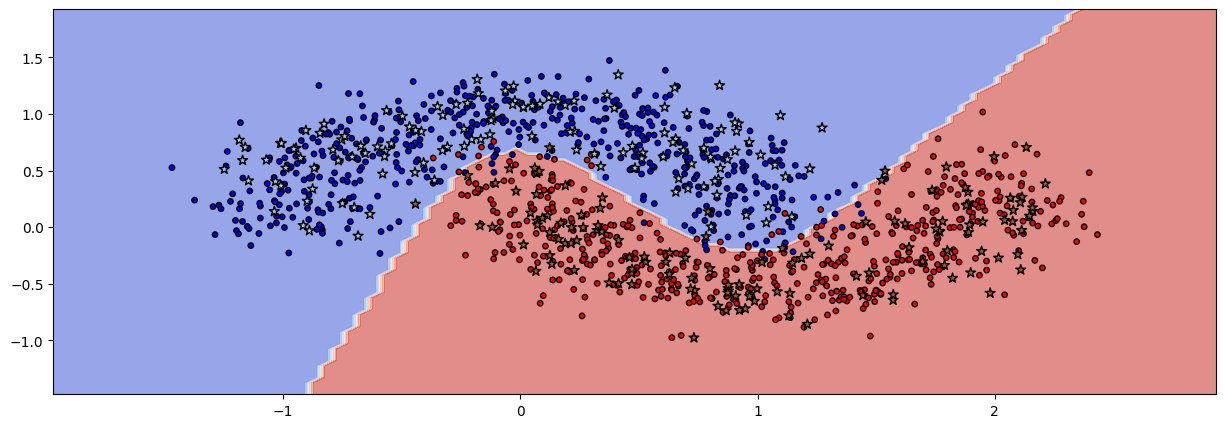

In [34]:
fn_plot_decision_boundary(lambda XX : predict(model,XX),x_train,y_train,x_test,y_test)


**Q4**: How many epochs are sufficient?

I used 1,50,000 epochs to allow the model to fully learn the patterns in the data. Early stopping was not used, but the high number of epochs helped achieve better accuracy through extended training.